In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models, optimizers, callbacks
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#generating data

train_ds=keras.utils.image_dataset_from_directory(
    directory='DIAT-uSAT_dataset_new/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True
)

val_ds=keras.utils.image_dataset_from_directory(
    directory='DIAT-uSAT_dataset_new/val',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224,224),
    shuffle=False
)
test_ds=keras.utils.image_dataset_from_directory(
    directory='DIAT-uSAT_dataset_new/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224,224),
    shuffle=False
)

Found 4120 files belonging to 6 classes.
Found 240 files belonging to 6 classes.
Found 489 files belonging to 6 classes.


In [3]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

In [4]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [5]:
model=Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(layers.Dense(512, activation='relu'))  
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

In [6]:
# Compile the model
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor='val_loss',  
    factor=0.5,
    patience=2,
    min_lr=1e-7,
    verbose=1
)

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,563,334 (105.15 MB)

 Trainable params: 19,928,070 (76.02 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [8]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[lr_scheduler]
)

Epoch 1/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.5996 - loss: 3.3917 - val_accuracy: 0.9250 - val_loss: 0.2297 - learning_rate: 1.0000e-04
Epoch 2/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - accuracy: 0.9125 - loss: 0.2914 - val_accuracy: 0.9667 - val_loss: 0.2029 - learning_rate: 1.0000e-04
Epoch 3/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.9508 - loss: 0.1520 - val_accuracy: 0.9375 - val_loss: 0.2541 - learning_rate: 1.0000e-04
Epoch 4/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - accuracy: 0.9646 - loss: 0.1195 - val_accuracy: 0.9667 - val_loss: 0.0848 - learning_rate: 1.0000e-04
Epoch 5/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.9800 - loss: 0.0561 - val_accuracy: 0.9792 - val_loss: 0.0976 - learning_rate: 1.0000e-04
Epoch 6/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - accuracy: 0.9882 - loss: 0.0367 - val_accuracy: 0.9708 - val_loss: 0.0827 - learning_rate: 1.0000e-04
Epoch 7/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - acc

In [9]:
model.save('final model.h5')

In [10]:
model.evaluate(test_ds)

16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9868 - loss: 0.0924


[0.08357175439596176, 0.987730085849762]

In [11]:
import cv2

In [41]:
test_img=cv2.imread("DIAT-uSAT_dataset_new/test/Bird/figure753.jpg")

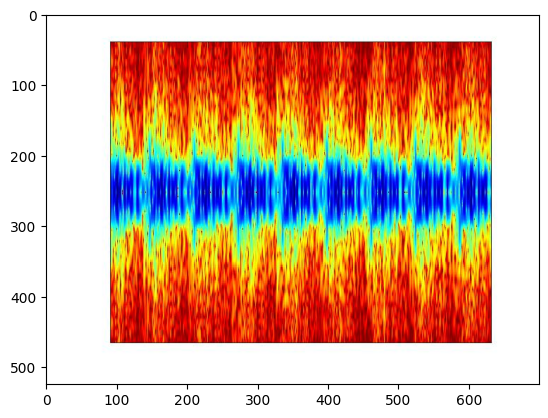

In [42]:
plt.imshow(test_img)

In [43]:
test_img=cv2.resize(test_img,(224,224))

In [44]:
test_input=test_img.reshape((1,224,224,3))

In [45]:
predictions = model.predict(test_input)[0]

#defining a dictionary for labels

d={0:'3 long blade rotor',
   1: '3 short blade rotor',
   2:'bird',
   3:'bird with mini helicopter',
   4:'drone',
   5:'rc plane'}

#Get the index of the maximum element
max_index = np.argmax(predictions)
# Get the maximum value
max_value = predictions[max_index]
print(f"Probability: {max_value}, Class: {d[max_index]}")

predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Probability: 1.0, Class: bird


array([2.7656100e-12, 4.5313539e-15, 1.0000000e+00, 3.2634956e-14,
       5.1985437e-11, 7.6992659e-14], dtype=float32)